# Essentials of Portfolio Optimization

This document provides a comprehensive exploration of portfolio optimization, presenting a systematic approach to maximizing returns for a given level of risk. It covers Modern Portfolio Theory (MPT), efficient frontier construction, risk and return calculations, and various strategies for achieving optimal portfolios, including techniques for minimizing volatility, targeting specific returns, and maximizing the Sharpe Ratio. The content is enhanced with Python examples, offering practical insights into implementing these strategies. Additionally, it delves into portfolio constraints like short selling and risk-free asset integration, presenting advanced concepts such as the Capital Market Line (CML) and portfolio weight calculations for different investment scenarios. This guide serves as a valuable resource for anyone looking to understand and apply portfolio optimization techniques in real-world scenarios.

===

## Table of Contents

[Modern Portfolio Theory (MPT)](#modern-portfolio-theory-mpt)

- [Introduction to MPT](#introduction-to-mpt)
- [Efficient Frontiers](#efficient-frontiers)
  - [Understanding Efficient Frontiers](#understanding-efficient-frontiers)
  - [Calculating Efficient Frontiers](#calculating-efficient-frontiers)
- [Portfolio Return](#portfolio-return)
- [Portfolio Volatility](#portfolio-volatility)
  - [Understanding Portfolio Volatility](#understanding-portfolio-volatility)
  - [Calculating and Minimizing Volatility](#calculating-and-minimizing-volatility)

[Examining Efficient Frontiers with Two-Asset Portfolios](#examining-efficient-frontiers-with-two-asset-portfolios)

- [Setting Up the Scenario](#setting-up-the-scenario)
- [Analyzing Results and Implications](#analyzing-results-and-implications)

[Real-World Example: Analyzing U.S. Stocks for Portfolio Optimization](#real-world-example-analyzing-us-stocks-for-portfolio-optimization)

- [Selecting Stocks and Fetching Data](#selecting-stocks-and-fetching-data)
- [Calculating Returns, Volatility, and Portfolio Metrics](#calculating-returns-volatility-and-portfolio-metrics)
- [Visualizing Portfolios and the Efficient Frontier](#visualizing-portfolios-and-the-efficient-frontier)

[Strategies for Optimal Portfolios](#strategies-for-optimal-portfolios)

- [Seeking Minimum Volatility](#seeking-minimum-volatility)
- [Targeting Specific Returns with Minimized Volatility](#targeting-specific-returns-with-minimized-volatility)
- [Maximizing the Sharpe Ratio](#maximizing-the-sharpe-ratio)
- [Achieving Maximum Sharpe Ratio with Set Volatility](#achieving-maximum-sharpe-ratio-with-set-volatility)

[Reflections on Portfolio Constraints](#reflections-on-portfolio-constraints)

- [Short Selling & Flexible Weights: Finding Low Volatility Portfolio for a Set Return](#short-selling--flexible-weights-finding-low-volatility-portfolio-for-a-set-return)
- [Short Selling & Normalized Weights: Minimum Volatility Portfolio Given a Fixed Return](#short-selling--normalized-weights-minimum-volatility-portfolio-given-a-fixed-return)

[Optimizing the Sharpe Ratio Portfolio with a Non-Zero Risk-Free Rate](#optimizing-the-sharpe-ratio-portfolio-with-a-non-zero-risk-free-rate)

- [Capital Market Line (CML) Essentials](#capital-market-line-cml-essentials)
- [Maximizing the Sharpe Ratio Portfolio with a Non-Zero Risk-Free Asset](#maximizing-the-sharpe-ratio-portfolio-with-a-non-zero-risk-free-asset)
  - [Portfolio Return & Volatility](#portfolio-return--volatility)
  - [Portfolio Weights for Full Allocation to Risky Assets (Maximum Sharpe Ratio)](#portfolio-weights-for-full-allocation-to-risky-assets-maximum-sharpe-ratio)

**This section utilizes Python modules to demonstrate the core concepts of Portfolio Optimization:**

In [1]:
# Standard libraries for data handling and numerical operations
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

# Libraries for plotting and visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Import the font manager from matplotlib for managing fonts
import matplotlib.font_manager as font_manager

import seaborn as sns  # For advanced visualization styles

# Additional libraries for statistical analysis and optimization
import scipy.stats  # For statistical functions
from scipy.optimize import minimize  # For optimization functions

# Libraries for fetching financial data and handling date/time
import yfinance as yf  # For fetching financial data using yfinance
from pandas_datareader import data  # For fetching financial data
from datetime import datetime  # For handling date and time objects

# Import tabulate for creating tables
from tabulate import tabulate

# Custom toolkit for portfolio optimization
import sys
sys.path.append("../../")  # Adding the toolkit's directory to system path
import PortfolioOptimizationKit as pok  # Custom toolkit for portfolio optimization

# Setting the plot style for visual consistency
sns.set_style("dark")  # Setting the plot style for Seaborn

In [2]:
# This line loads the autoreload extension in Jupyter.
# Autoreload helps automatically reload imported modules before executing code,
# ensuring that changes in the modules are reflected without restarting the kernel.
%load_ext autoreload

# This line configures the autoreload extension to reload all modules (not just those listed in %aimport)
# every time code is executed. '2' is the mode of autoreload that ensures this behavior.
%autoreload 2

# This line sets up the Jupyter notebook to display matplotlib plots inline.
# This means that generated plots will appear directly below the code cell that produced them.
%matplotlib inline

In [3]:
# Define the relative paths to the font files from the current working directory
montserrat_font_path = "../../toolbox/font/Montserrat-ExtraBold.ttf"
paytone_font_path = "../../toolbox/font/PaytoneOne.ttf"
sourcesanspro_font_path = "../../toolbox/font/SourceSansProSemiBold.ttf"

# Set the Montserrat-ExtraBold font properties
montserrat_font = font_manager.FontProperties(fname=montserrat_font_path, size=12)

# Set the PaytoneOne font properties
paytone_font = font_manager.FontProperties(fname=paytone_font_path, size=11)

# Set the SourceSansPro font properties
sourcesanspro_font = font_manager.FontProperties(fname=sourcesanspro_font_path, size=10)

## Modern Portfolio Theory (MPT)

### Introduction to MPT

**`Modern Portfolio Theory (MPT)`** is a mathematical framework for **`constructing a portfolio of assets to maximize expected return for a given level of risk`**. It's based on the **`principle of diversification`**, suggesting that a mixed variety of investments yields less risk than any single investment.

### Efficient Frontiers

#### Understanding Efficient Frontiers

In MPT, the **`efficient frontier`** is a graph showing the **`best possible return for a given level of risk`**. Introduced by Harry Markowitz in 1952, it represents portfolios that optimize the expected return for a given standard deviation (risk).

The goal is to allocate investment across multiple assets, determining the optimal percentage for each to maximize returns for a specific risk level.

#### Calculating Efficient Frontiers

Assume we have $N > 1$ stocks. Let $\mathbf{w}:=(w_1,\dots,w_N)^T$ represent the investment proportions in each asset, constrained by $\sum_{i=1}^N w_i = 1$. These are the investment weights.

$R_i$ and $R_p$ represent the return of asset $i$ and the total portfolio return, respectively. Similarly, $\sigma_i$ and $\sigma_p$ denote the volatility of asset $i$ and the portfolio, respectively.

### Portfolio Return

The **`portfolio return`** is a weighted average of the individual asset returns:

$$
R_p = \sum_{i=1}^N w_i R_i = \mathbf{w}^T \mathbf{R},
$$

where $\mathbf{R} := (R_1,\dots,R_N)^T$. For historical data, $R_p$ uses past returns. For future investments, expected returns $\mathbb{E}$, replace actual returns.

### Portfolio Volatility

#### Understanding Portfolio Volatility

**`Portfolio volatility`** is the standard deviation of the weighted sum of asset returns.

#### Calculating and Minimizing Volatility

Considering an example with just two assets, where $w_1$ and $w_2$ are the weights and $R_1$ and $R_2$ are the returns of these assets, the portfolio's variance is expressed as:

$$
\sigma_p^2 =   \text{Var}(w_1 R_1 + w_2 R_2) =
w_1^2 \text{Var}(R_1) + w_2^2\text{Var}(R_2) + 2w_1 w_2\text{Cov}(R_1,R_2) =
w_1^2 \sigma_1^2 + w_2^2\sigma_2^2 + 2w_1 w_2\text{Cov}(R_1,R_2),
$$

where $\text{Cov}(R_1,R_2) = \mathbb{E}[(R_1-\mu_1)(R_2 - \mu_2)]$ represents the covariance between the two assets, with $\mu_i$ and $\mu_j$ as their mean returns.

Defining the correlation coefficient between the assets as $\rho_{1,2} = \frac{\text{Cov}(R_1,R_2)}{\sigma_1 \sigma_2}$, the portfolio's volatility for two assets can be simplified to:

$$
\sigma_p =
\sqrt{ w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1 w_2 \sigma_1 \sigma_2 \rho_{1,2} }.
$$

It's worth mentioning that by employing matrix notation, we can succinctly express this volatility calculation.

The portfolio's volatility, $\sigma_p$, can be expressed as:

$$
\sigma_p = \sqrt{(w_1, w_2)
\begin{pmatrix}
\sigma^2_1 & \sigma_1 \sigma_2 \rho_{12} \\
\sigma_1 \sigma_2 \rho_{21} & \sigma^2_2
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix}}
$$

This simplifies to:

$$
\sigma_p = \sqrt{\mathbf{w}^T \Sigma \mathbf{w}}
$$

Where the covariance matrix, $\Sigma$, is defined as:

$$
\Sigma :=
\begin{pmatrix}
\sigma^2_1 & \sigma_1 \sigma_2 \rho_{12} \\
\sigma_1 \sigma_2 \rho_{21} & \sigma^2_2
\end{pmatrix}
$$

For a portfolio of $N$ stocks, the covariance matrix $\Sigma = [c_{ij}]$ is an $N\times N$ matrix where each element $c_{ij} = \sigma_i \sigma_j \rho_{ij}$ represents the covariance between assets $i$ and $j$, and $c_{ii}=\sigma_i^2$ is the variance of asset $i$ (the diagonal elements of the covariance matrix).

Extending this concept to matrix notation for compactness, the portfolio's volatility is:

$$
\sigma_p = \sqrt{ \mathbf{w}^T \Sigma \mathbf{w} }.
$$

## Examining Efficient Frontiers with Two-Asset Portfolios

### Setting Up the Scenario

Here, we present a hypothetical example to observe the efficient frontier formed by various portfolios comprising only two assets with differing correlation coefficients, $\rho_{12}$. Initially, we generate $500$ daily returns for two assets:

In [4]:
nret = 500  # Number of returns
periods_per_year = 252  # Trading days in a year
risk_free_rate = 0.0  # Risk-free rate for Sharpe ratio calculation

Next, we establish the mean returns and volatilities for our two hypothetical assets:

In [5]:
mean_1 = 0.001019  # Mean return for asset 1
mean_2 = 0.001249  # Mean return for asset 2
vol_1  = 0.016317  # Volatility for asset 1
vol_2  = 0.019129  # Volatility for asset 2

We then define $6$ correlation coefficients for the assets, and for each correlation, we will generate $20$ portfolios using different weight pairs:

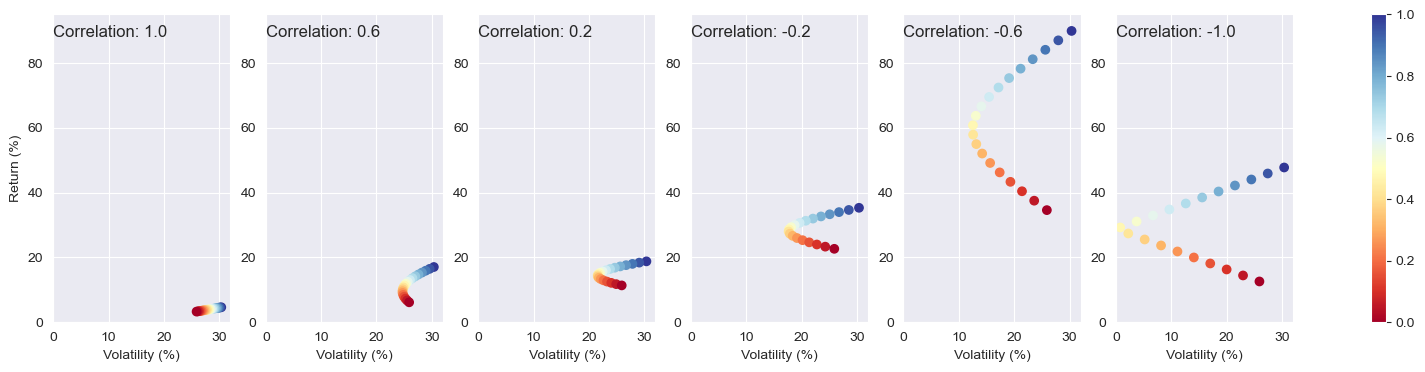

In [11]:
# Generate an array of correlation coefficients between two assets, ranging from 1 to -1.
rhos = np.linspace(1, -1, num=6)

# Count of correlation values
ncorr = len(rhos)

# Generate portfolio weights. 'nweig' defines the number of weight combinations.
nweig = 20
w1 = np.linspace(0, 1, num=nweig)  # Linearly spaced weights for the first asset.
w2 = 1 - w1  # Complementary weights for the second asset.
ww = pd.DataFrame([w1, w2]).T  # Dataframe of weight combinations.

# Seed for random number generation to ensure reproducibility.
np.random.seed(1)

# Set up the plot - 6 subplots (one for each correlation coefficient).
fig, ax = plt.subplots(1, 6, figsize=(20, 4))
ax = ax.flatten()  # Flatten the array of axes for easy indexing.

# Loop through each correlation coefficient.
for k_rho, rho in enumerate(rhos):
    # Initialize a DataFrame to store returns, volatility, and Sharpe ratio for each portfolio combination.
    portfolio = pd.DataFrame(columns=["return", "volatility", "sharpe ratio"], dtype=float)

    # Calculate the covariance between the two assets based on the current correlation coefficient.
    cov_ij = rho * vol_1 * vol_2
    cov_rets = pd.DataFrame([[vol_1**2, cov_ij], [cov_ij, vol_2**2]])

    # Generate daily returns for the two assets based on their mean returns and covariance matrix.
    daily_rets = pd.DataFrame(np.random.multivariate_normal((mean_1, mean_2), cov_rets.values, nret))

    # Loop through each weight combination.
    for i in range(ww.shape[0]):
        weights = ww.loc[i]  # Current weight combination.

        # Annualize the returns for the portfolio.
        ann_rets = pok.annualize_rets(daily_rets, periods_per_year)
        # Calculate portfolio return based on weights and annualized returns.
        portfolio_ret = pok.portfolio_return(weights, ann_rets)
        # Calculate portfolio volatility.
        portfolio_vol = pok.portfolio_volatility(weights, cov_rets)
        # Annualize the portfolio volatility.
        portfolio_vol = pok.annualize_vol(portfolio_vol, periods_per_year)
        # Calculate the Sharpe ratio for the portfolio.
        portfolio_spr = pok.sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)

        # Create a new row for the portfolio DataFrame.
        new_row = pd.DataFrame([{
            "return": portfolio_ret, 
            "volatility": portfolio_vol, 
            "sharpe ratio": portfolio_spr
        }], columns=["return", "volatility", "sharpe ratio"])

        # Add the new row to the portfolio DataFrame.
        portfolio = pd.concat([portfolio, new_row], ignore_index=True)

    # Plot the portfolios for the current correlation coefficient.
    im = ax[k_rho].scatter(portfolio["volatility"]*100, portfolio["return"]*100, c=w2, cmap='RdYlBu') 
    ax[k_rho].grid()  # Add grid for better readability.
    # Set the title for each subplot to indicate the correlation coefficient.
    ax[k_rho].set_title(f"Correlation: {np.round(rho,2)}", y=0.9, loc='left')
    # Set the x-axis label as "Volatility (%)".
    ax[k_rho].set_xlabel("Volatility (%)")
    # Set the y-axis label as "Return (%)" for the first subplot only.
    if k_rho == 0: ax[k_rho].set_ylabel("Return (%)") 
    # Set x-axis and y-axis limits for uniformity across all plots.
    ax[k_rho].set_xlim([0, 32])
    ax[k_rho].set_ylim([0, 95])

# Add a color bar to show the mapping of colors to the weights of the second asset.
fig.colorbar(im, ax=ax.ravel().tolist())
plt.show()  # Display the plot

### Analyzing Results and Implications

Each point on the plots represents a specific portfolio's return and volatility pair for a given correlation. The color gradient reflects the weight allocation: red signifies a portfolio weighted entirely towards the first asset $\mathbf{w} = (1,0)$, while blue indicates complete investment in the second asset $\mathbf{w} = (0,1)$.

The plots demonstrate that lower asset correlations generally offer a more favorable return-to-volatility ratio. Notably, in the case of $\rho=-1$, it's theoretically possible to construct a portfolio yielding around $30\%$ return with minimal volatility.

## Real-World Example: Analyzing U.S. Stocks for Portfolio Optimization

This section explores the time series of selected U.S. stocks and demonstrates efficient portfolio construction methods.


### Selecting Stocks and Fetching Data

In [13]:
# Define stock tickers and calculate the number of assets
tickers  = ['AMZN','KO','MSFT']
n_assets = len(tickers)

# Initialize a DataFrame to store stock data
stocks = pd.DataFrame()

# Set the start and end dates for fetching historical data
start_date = "2011-01-01"
end_date = "2024-01-01"

# Loop through each stock to retrieve daily adjusted close prices over the specified period
for stock_name in tickers:
    ticker_data = yf.Ticker(stock_name)
    hist_data = ticker_data.history(start=start_date, end=end_date)
    stocks[stock_name] = hist_data['Close']

# Round the stock data for better readability
stocks = round(stocks,2)
stocks

,AMZN,KO,MSFT
Date,,,
2011-01-03 00:00:00-05:00,9.21,21.82,21.66
2011-01-04 00:00:00-05:00,9.25,21.37,21.75
2011-01-05 00:00:00-05:00,9.37,21.24,21.68
2011-01-06 00:00:00-05:00,9.29,21.08,22.31
2011-01-07 00:00:00-05:00,9.27,21.05,22.14
...,...,...,...
2023-12-22 00:00:00-05:00,153.42,58.32,374.58
2023-12-26 00:00:00-05:00,153.41,58.56,374.66
2023-12-27 00:00:00-05:00,153.34,58.71,374.07


### Calculating Returns, Volatility, and Portfolio Metrics

In [14]:
# Calculate daily returns using a portfolio optimization kit
daily_rets = pok.compute_returns(stocks)

# Annualize the daily returns assuming 252 trading days per year
ann_rets = pok.annualize_rets(daily_rets, 252)

# Compute mean, standard deviation, and covariance of daily returns
mean_rets = daily_rets.mean()
std_rets  = daily_rets.std()
cov_rets  = daily_rets.cov()

# Define parameters for portfolio simulation
periods_per_year = 252
num_portfolios   = 4000
portfolios       = pd.DataFrame(columns=["return","volatility","sharpe ratio","w1","w2","w3"])
risk_free_rate   = 0

# Generate portfolios with random weights
all_portfolios = []  # Initialize a list to collect all portfolio data

for i in range(num_portfolios):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)
    
    portfolio_ret = pok.portfolio_return(weights, ann_rets)        
    portfolio_vol = pok.portfolio_volatility(weights, cov_rets)
    portfolio_vol = pok.annualize_vol(portfolio_vol, periods_per_year)
    portfolio_spr = pok.sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)
    
    # Append the new portfolio data to the list
    all_portfolios.append({"return":portfolio_ret, 
                           "volatility":portfolio_vol, 
                           "sharpe ratio":portfolio_spr, 
                           "w1": weights[0], 
                           "w2": weights[1], 
                           "w3": weights[2]})

# Convert the list of all portfolio data into a DataFrame
portfolios = pd.DataFrame(all_portfolios)
portfolios

,return,volatility,sharpe ratio,w1,w2,w3
0,0.170084,0.210186,0.809208,0.508915,0.441280,0.049805
1,0.229691,0.265132,0.866328,0.638497,0.079373,0.282130
2,0.160581,0.187729,0.855388,0.342447,0.503263,0.154290
3,0.209079,0.223307,0.936288,0.390579,0.210485,0.398936
4,0.198273,0.233286,0.849913,0.568234,0.270187,0.161579
...,...,...,...,...,...,...
3995,0.193756,0.207954,0.931726,0.343689,0.303920,0.352390
3996,0.211776,0.241106,0.878350,0.555753,0.189433,0.254813
3997,0.159276,0.178658,0.891513,0.172563,0.516094,0.311344
3998,0.205605,0.253026,0.812584,0.675339,0.222990,0.101672


### Visualizing Portfolios and the Efficient Frontier

A scatter plot is created to visualize the portfolios and the efficient frontier:

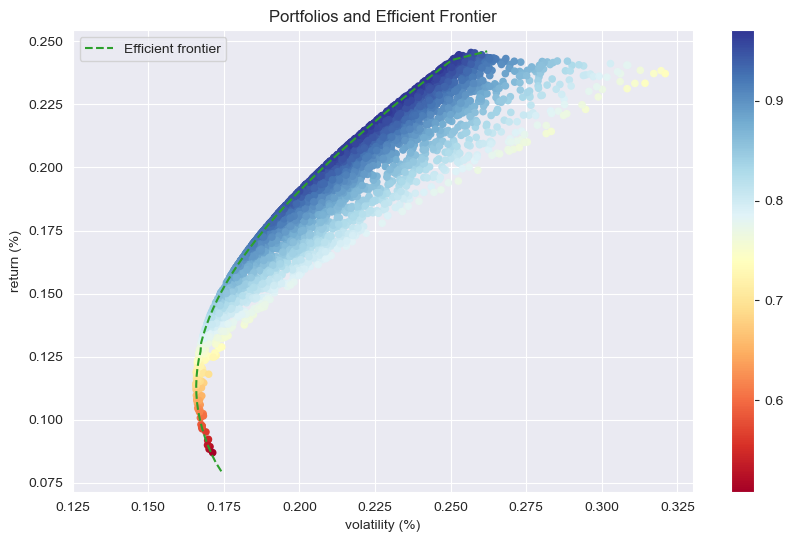

In [15]:
# Initialize the plot for portfolios and efficient frontier
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

# Scatter plot of portfolios colored based on Sharpe ratio
im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, 
                edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and Efficient Frontier")
ax.set_ylabel("return (%)")
ax.grid()

# Draw the line for the efficient frontier
df = pok.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="tab:green", ax=ax, grid=True, 
             label="Efficient frontier")
ax.set_xlim([0.125,0.33])
ax.set_xlabel("volatility (%)")

# Add a color bar indicating the scale of Sharpe ratio
fig.colorbar(im, ax=ax)
plt.show()

The scatter plot demonstrates how portfolios are distributed with respect to their returns and volatility, with the efficient frontier indicating the optimal trade-off.

Finally, the **`Global Minimum Volatility (GMV)`** portfolio and the **`Maximum Sharpe Ratio (MSR)`** portfolio are identified:

Global Minimum Volatility portfolio:
- return      : 11.33%
- volatility  : 16.59%
- sharpe ratio: 0.68
Maximum Sharpe Ratio portfolio:
- return      : 22.53%
- volatility  : 23.21%
- sharpe ratio: 0.97


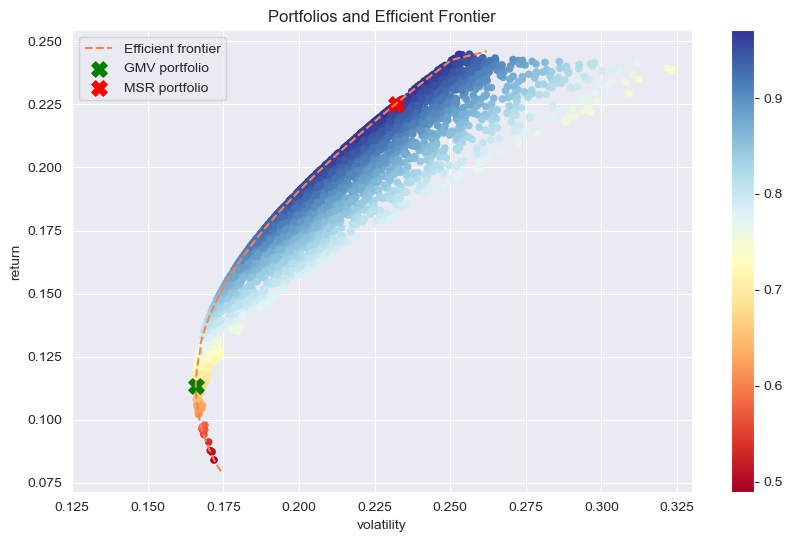

In [13]:
# Locate the portfolio with the lowest volatility (GMV)
low_vol_portfolio = portfolios.iloc[portfolios['volatility'].idxmin()]
print("Global Minimum Volatility portfolio:")
print("- return      : {:.2f}%".format(low_vol_portfolio['return']*100))
print("- volatility  : {:.2f}%".format(low_vol_portfolio['volatility']*100))
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio['sharpe ratio']))

# Locate the portfolio with the highest Sharpe ratio (MSR)
high_sharpe_portfolio = portfolios.iloc[portfolios['sharpe ratio'].idxmax()]
print("Maximum Sharpe Ratio portfolio:")
print("- return      : {:.2f}%".format(high_sharpe_portfolio['return']*100))
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio['volatility']*100))
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio['sharpe ratio']))

# Plot to showcase GMV and MSR portfolios on the scatter plot
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

# Scatter plot of portfolios with Sharpe ratio coloring
im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], 
                s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and Efficient Frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# Plot the efficient frontier
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, 
             label="Efficient frontier")

# Highlight GMV and MSR portfolios
ax.scatter(low_vol_portfolio['volatility'], low_vol_portfolio['return'], 
           marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio['volatility'], high_sharpe_portfolio['return'], 
           marker="X", color='r', s=120, label="MSR portfolio")

ax.set_xlim([0.125,0.33])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()

This code calculates and visualizes important aspects of portfolio optimization, identifying key portfolios and demonstrating the potential benefits of diversification and strategic asset allocation.

In [16]:
def get_portfolio_features(weights, rets, covmat, risk_free_rate, periods_per_year):
    """
    Calculate and print portfolio return, volatility, and Sharpe ratio.

    Parameters:
    - weights: Array of asset weights in the portfolio.
    - rets: Annualized returns for each asset.
    - covmat: Covariance matrix of asset returns.
    - risk_free_rate: Risk-free rate for Sharpe ratio calculation.
    - periods_per_year: Number of periods in a year (trading days).

    Returns:
    Tuple of (return, volatility, sharpe ratio) for the portfolio.
    """
    # Calculate portfolio volatility
    vol = pok.portfolio_volatility(weights, covmat)
    vol = pok.annualize_vol(vol, periods_per_year)

    # Calculate portfolio return
    ret = pok.portfolio_return(weights, rets)

    # Calculate portfolio Sharpe ratio
    shp = pok.sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)

    # Display the calculated metrics
    print("Portfolio return:       {:.2f}%" .format(ret*100))
    print("Portfolio volatility:   {:.2f}%" .format(vol*100))
    print("Portfolio Sharpe ratio: {:.2f}" .format(shp))
    
    return ret, vol, shp

## Strategies for Optimal Portfolios

### Seeking Minimum Volatility

To identify the optimal portfolios on the efficient frontier, a minimization problem is solved, rather than simulating numerous portfolios. For instance, to find the portfolio with the minimum volatility on the efficient frontier, the following minimization problem is solved:

Minimize:

$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w},
$$

subject to

$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

AMZN    0.241135
KO      0.079572
MSFT    0.246025
dtype: float64
Optimal weights:
  AMZN: 9.63%
  KO:   79.02%
  MSFT: 11.35%
Portfolio return:       11.40%
Portfolio volatility:   16.58%
Portfolio Sharpe ratio: 0.69


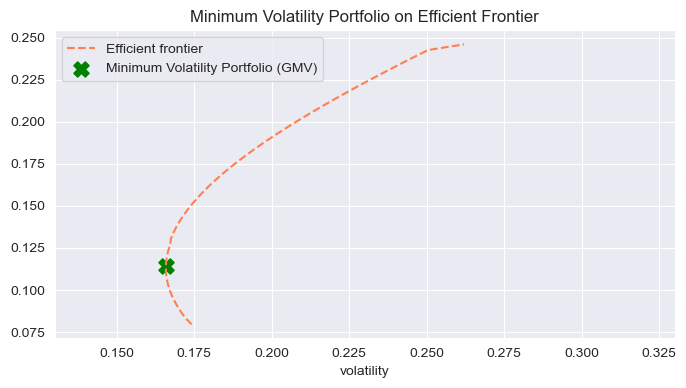

Global Minimum Volatility (GMV) portfolio comparison:

+------------------------+----------+--------------+----------------+
| Portfolio              | Return   | Volatility   |   Sharpe Ratio |
+========================+==========+==============+================+
| Monte Carlo Simulation | 11.44%   | 16.58%       |           0.69 |
+------------------------+----------+--------------+----------------+
| Minimization Problem   | 11.40%   | 16.58%       |           0.69 |
+------------------------+----------+--------------+----------------+


In [30]:
# Display the annual returns of the individual assets being considered for investment
ann_rets = pok.annualize_rets(daily_rets, periods_per_year)
print(ann_rets)

# Find optimal weights for the portfolio with minimum volatility
optimal_weights = pok.minimize_volatility(ann_rets, cov_rets)
print("Optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

# Calculate portfolio features for the portfolio with minimum volatility
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Plot the efficient frontier and mark the minimum volatility portfolio
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = pok.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='g', s=120, label="Minimum Volatility Portfolio (GMV)")
ax.set_xlim([0.13,0.33])
ax.legend()
ax.set_title("Minimum Volatility Portfolio on Efficient Frontier")
plt.show()

# Locate the portfolio with the lowest volatility (GMV)
low_vol_portfolio = portfolios.iloc[portfolios['volatility'].idxmin()]

# Comparison of GMV portfolio from Monte Carlo simulation and minimization problem
# Define the data for the table
data = [
    ["Monte Carlo Simulation", 
     "{:.2f}%".format(low_vol_portfolio.iloc[0]*100),
     "{:.2f}%".format(low_vol_portfolio.iloc[1]*100),
     "{:.2f}".format(low_vol_portfolio.iloc[2])],
    
    ["Minimization Problem", 
     "{:.2f}%".format(ret*100),
     "{:.2f}%".format(vol*100),
     "{:.2f}".format(shp)]
]

# Define the headers
headers = ["Portfolio", "Return", "Volatility", "Sharpe Ratio"]

# Display the table
print("Global Minimum Volatility (GMV) portfolio comparison:\n")
print(tabulate(data, headers=headers, tablefmt='grid'))

This code calculates the optimal portfolio with minimum volatility, compares it with results from a Monte Carlo simulation, and visualizes the efficient frontier with the identified optimal portfolio. It demonstrates the practical application of optimization techniques in portfolio management.

### Targeting Specific Returns with Minimized Volatility

To identify the portfolio on the efficient frontier with minimum volatility for a predetermined level of return, an additional constraint is introduced into the minimization problem:

$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w},
$$

subject to

$$
\begin{cases}
\mathbf{w}^T \mathbf{R} = R_0, \\
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

where $R_0$ represents the predetermined level of expected return. As an illustration, assume the target total expected return $R_0=16\%$:

In [31]:
# Set the target return for the portfolio
target_return = 0.16

The minimization can then be executed with the constraint set for the specified target return:

In [32]:
# Calculate optimal weights to minimize volatility for the given target return
optimal_weights = pok.minimize_volatility(ann_rets, cov_rets, target_return)
# Display the optimal weights for each stock
print("Optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

Optimal weights:
  AMZN: 14.02%
  KO:   51.27%
  MSFT: 34.71%


Next, the volatility of the portfolio constructed with these optimal weights is calculated. The corresponding return is verified to ensure it matches the chosen target return (i.e., $16\%$). This portfolio is then positioned on the efficient frontier:

Portfolio return:       16.00%
Portfolio volatility:   17.88%
Portfolio Sharpe ratio: 0.89


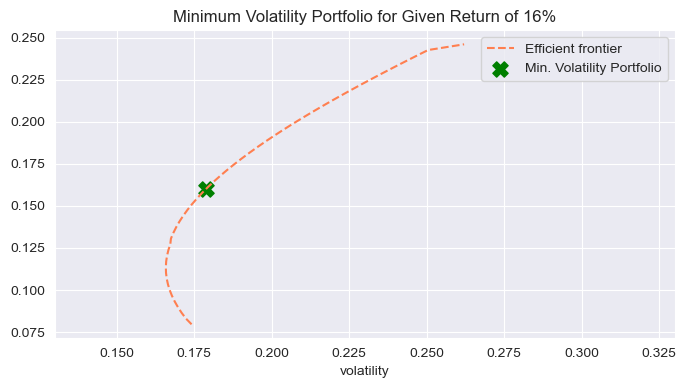

In [33]:
# Calculate and display the portfolio's return, volatility, and Sharpe ratio
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Visualize the efficient frontier and mark the minimum volatility portfolio for the given return
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = pok.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, target_return,  marker="X", color='g', s=120, label="Min. Volatility Portfolio")
ax.set_xlim([0.13,0.33])
ax.legend()
ax.set_title("Minimum Volatility Portfolio for Given Return of 16%")
plt.show()

It's important to note that the return of a portfolio will be confined between the minimum and maximum returns of the assets composing the portfolio. For instance, with the same three companies, achieving a return of $40\%$ is not feasible since the highest achievable return is approximately $30\%$ from Amazon. Attempting to set a target return of $40\%$ would yield a portfolio heavily weighted towards the asset with the highest return:

In [34]:
# Attempting to minimize volatility for an unattainable target return
optimal_weights = pok.minimize_volatility(ann_rets, cov_rets, 0.4)
# Display the resulting weights, predominantly favoring the asset with the highest return
print("Optimal weights for an unattainable target return:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

Optimal weights for an unattainable target return:
  AMZN: 0.00%
  KO:   0.00%
  MSFT: 100.00%


This code segment effectively illustrates how to calculate an optimal portfolio with minimum volatility for a set target return, visualizing its position on the efficient frontier, and highlighting the limitations based on the returns of individual assets.

### Maximizing the Sharpe Ratio

This section delves into the methodology of locating the portfolio along the efficient frontier that yields the maximum Sharpe ratio. In essence, this portfolio offers the highest return per unit of risk.

**Understanding the Sharpe Ratio Maximization**:

The Sharpe ratio is a critical metric, quantifying the return earned above the risk-free rate per unit of volatility. While the **`scipy`** library provides a method for minimization, it doesn't offer a direct function for maximization. However, one can achieve the maximization of the Sharpe ratio by minimizing its negative value. Thus, the optimization problem transforms as follows:

Minimize the negative Sharpe ratio:

$$
\text{minimize} \;\; -  \frac{R_p - r_f}{\sigma_p} =: \text{SR} 
$$

subject to the constraints:

$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

Employing the Minimizer:

In [35]:
# Utilize the custom toolkit to find the optimal weights maximizing the Sharpe ratio
optimal_weights = pok.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("Optimal weights for Maximum Sharpe Ratio Portfolio:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

Optimal weights for Maximum Sharpe Ratio Portfolio:
  AMZN: 20.85%
  KO:   10.88%
  MSFT: 68.26%


Calculating and Visualizing the Optimal Portfolio:

Portfolio return:       22.69%
Portfolio volatility:   23.37%
Portfolio Sharpe ratio: 0.97


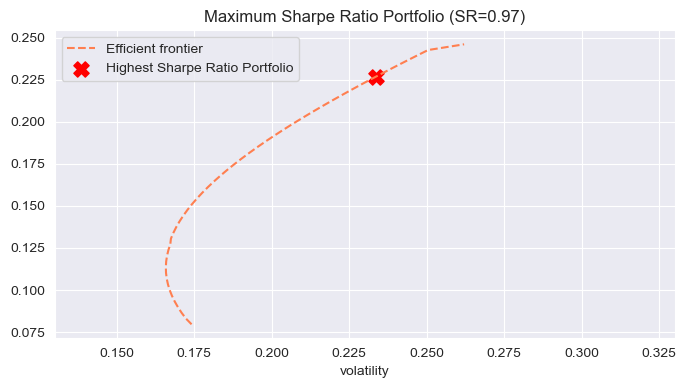

In [36]:
# Calculate the return, volatility, and Sharpe ratio of the optimal portfolio
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Plotting the efficient frontier with the marked Maximum Sharpe Ratio Portfolio
fig, ax = plt.subplots(1, 1, figsize=(8, 4)) 
df = pok.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret, marker="X", color='r', s=120, label="Highest Sharpe Ratio Portfolio")
ax.set_xlim([0.13, 0.33])
ax.legend()
ax.set_title("Maximum Sharpe Ratio Portfolio (SR={:.2f})".format(shp))
plt.show()

Comparing with Monte Carlo Simulation Results:

In [39]:
high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]

# Contrast the optimized portfolio with the one obtained from Monte Carlo simulation
print("Maximum Sharpe Ratio (MSR) portfolio comparison:\n")
print("- Monte Carlo Simulation:")
print("  return:       {:.2f}%".format(high_sharpe_portfolio.iloc[0]*100))
print("  volatility:   {:.2f}%".format(high_sharpe_portfolio.iloc[1]*100))
print("  Sharpe ratio: {:.2f}".format(high_sharpe_portfolio.iloc[2]))
print("\n- Optimization Problem:")
print("  return:       {:.2f}%".format(ret*100))
print("  volatility:   {:.2f}%".format(vol*100))
print("  Sharpe ratio: {:.2f}".format(shp))

Maximum Sharpe Ratio (MSR) portfolio comparison:

- Monte Carlo Simulation:
  return:       22.61%
  volatility:   23.29%
  Sharpe ratio: 0.97

- Optimization Problem:
  return:       22.69%
  volatility:   23.37%
  Sharpe ratio: 0.97


### Achieving Maximum Sharpe Ratio with Set Volatility

To pinpoint the **`portfolio on the efficient frontier with the highest Sharpe ratio at a certain volatility level`**, one must incorporate an additional constraint into the optimization problem:

$$
\text{minimize} \;\; -  \frac{R_p - r_f}{\sigma_p} =: \text{SR} 
$$

subject to

$$
\begin{cases}
\frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} = \sigma_0, \\
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

where $\sigma_0$ signifies a predetermined level of portfolio volatility. Consider, for instance, setting a total portfolio volatility target of $\sigma_0=20\%$:

Optimal weights:
  AMZN: 17.22%
  KO:   32.74%
  MSFT: 50.04%
Portfolio return:       19.07%
Portfolio volatility:   20.00%
Portfolio Sharpe ratio: 0.95


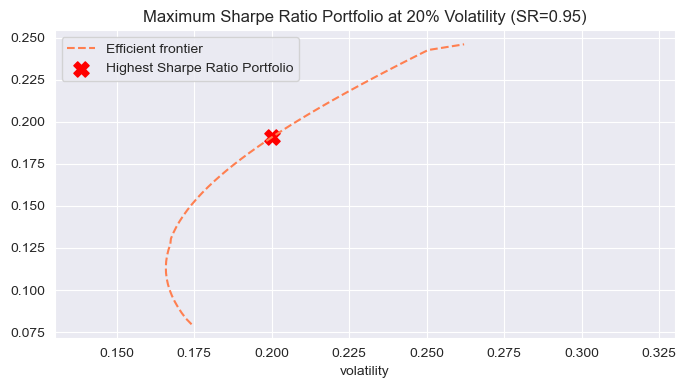

In [40]:
# Define the target volatility for the portfolio
target_volatility = 0.2

# Calculate the optimal weights to maximize Sharpe ratio for the given target volatility
optimal_weights = pok.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year, target_volatility)

# Display the optimal weights for each asset
print("Optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

# Retrieve and display the portfolio's return, volatility, and Sharpe ratio
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Visualize the efficient frontier and indicate the portfolio with the highest Sharpe ratio at the specified volatility
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df = pok.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret, marker="X", color='r', s=120, label="Highest Sharpe Ratio Portfolio")
ax.set_xlim([0.13, 0.33])
ax.legend()
ax.set_title("Maximum Sharpe Ratio Portfolio at 20% Volatility (SR={:.2f})".format(shp))
plt.show()

This approach systematically calculates the portfolio with the highest Sharpe ratio for a given level of volatility, illustrating its efficiency through visualization on the efficient frontier. The code demonstrates a methodical application of optimization techniques in portfolio management, focusing on risk-adjusted returns.

## Reflections on Portofolio Constraints

Until now, the focus has been on investing all capital while only buying assets. This is known as a **`long-only strategy`**, where the sum of the weights of assets is $1$ (indicating full investment) and all weights are non-negative (indicating only buying). These conditions were built into the optimization problems solved so far.

However, one might choose not to invest all their capital or even engage in **`short selling`** (selling assets one doesn't own but borrows instead).

### Short Selling & Flexible Weights: Finding Low Volatility Portfolio for a Set Return

The optimization problem can be simplified by removing the constraints for positive weights and full investment:

$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$

only ensuring that the portfolio meets a desired return $R_0$:

$$
\mathbf{w}^T \mathbf{R} = R_0.
$$

In this scenario, short selling is allowed, and there's no need to use all the available capital.

To solve this, **`Lagrange multipliers`** come in handy. The Lagrangian for this problem is:

$$
\mathcal{L}(\mathbf{w}, \lambda) := \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} - \lambda(  \mathbf{w}^T \mathbf{R} - R_0 ),
$$

Setting its partial derivatives to zero gives us:

$$
\begin{cases}
\frac{\partial\mathcal{L}}{\partial \mathbf{w}} &= \frac{1}{2} (2\Sigma \mathbf{w}) - \lambda  \mathbf{R} = 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{R} + R_0 = 0.
\end{cases}
$$

From here, we find:

$$
\Sigma \mathbf{w} - \lambda  \mathbf{R} = 0 
\quad\Longrightarrow\quad 
\mathbf{w} = \lambda \Sigma^{-1}\mathbf{R},  
$$

and

$$
- ( \lambda \Sigma^{-1}\mathbf{R} )^T \mathbf{R} + R_0 = 0
\quad\Longrightarrow\quad 
\lambda \mathbf{R}^T \Sigma^{-1} \mathbf{R} = R_0
\quad\Longrightarrow\quad 
\lambda = \frac{R_0}{\mathbf{R}^T \Sigma^{-1} \mathbf{R}}.
$$

Given that the covariance matrix $\Sigma$ is symmetric, its inverse $\Sigma^{-1}$ is also symmetric, meaning $(\Sigma^{-1})^T = \Sigma^{-1}$. By substituting $\lambda$ back into the equation, we derive the analytical solution for the weights. Thus, the optimal weights are:

$$
\mathbf{w}^* = R_0 \frac{\Sigma^{-1}\mathbf{R}}{\mathbf{R}^T \Sigma^{-1} \mathbf{R}},
$$

This formula provides a precise method to calculate the weights. It's important to note that without the normalization constraint (ensuring weights sum to $1$), the resulting weights may not represent a fully invested portfolio.
Also, it shows us the best weights to use for our assets to minimize volatility while achieving a set return, $R_0$. Importantly, because we've removed the constraint that weights must sum to $1$, these weights might not represent a fully invested portfolio and could include short selling.

### Short Selling & Normalized Weights: Minimum Volatility Portfolio Given a Fixed Return

This section explores finding the optimal portfolio weights to minimize volatility, given a fixed return, while allowing for short selling but ensuring all capital is invested. Unlike previous constraints, here weights don't need to be positive, and they sum up to one.

Minimization problem setup:

$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$

subject to the constraints:

$$
\begin{cases}
\mathbf{w}^T \mathbf{R} &= R_0,  \\
\mathbf{w}^T \mathbf{1} &= 1.
\end{cases}
$$

In this scenario, **`short selling`** is allowed (weights can be negative), but the total invested capital equals one.

Formulating the Lagrangian:

$$
\mathcal{L}(\mathbf{w}, \lambda) := \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} 
- \lambda( \mathbf{w}^T \mathbf{R} - R_0) - \delta(\mathbf{w}^T\mathbf{1}-1),
$$

where $\lambda$ and $\delta$ are Lagrange multipliers.

Setting the derivatives of the Lagrangian to zero yields:

$$
\begin{cases}
\frac{\partial\mathcal{L}}{\partial \mathbf{w}} &= \frac{1}{2} (2\Sigma \mathbf{w}) - \lambda \mathbf{R} - \delta \mathbf{1}= 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{R} + R_0 = 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{1} + R_0 = 0.
\end{cases}
$$

Solving for weights ($\mathbf{w}$) from the first equation:

$$
\mathbf{w} = \Sigma^{-1}(\lambda \mathbf{R} + \delta\mathbf{1}),
$$

Substituting $\mathbf{w}$ into the second and third equations and solving for $\lambda$ and $\delta$ yields a system of linear equations, respectively:

$$
\begin{cases}
\left(\Sigma^{-1}(\lambda \mathbf{R} + \delta\mathbf{1}) \right)^T\mathbf{R} 
&= \lambda \mathbf{R}^T\Sigma^{-1}\mathbf{R} + \delta\mathbf{1}\Sigma^{-1}\mathbf{R} = R_0, \\
\left(\Sigma^{-1}(\lambda \mathbf{R} + \delta\mathbf{1}) \right)^T\mathbf{1} 
&= \lambda \mathbf{R}^T\Sigma^{-1}\mathbf{1} + \delta\mathbf{1}\Sigma^{-1}\mathbf{1} = 1.
\end{cases}
$$

Defining constants $A$, $B$, and $C$ for compact representation:

$$
\begin{cases}
A & := \mathbf{R}^T \Sigma^{-1} \mathbf{R},  \\
B & := \mathbf{1}^T \Sigma^{-1} \mathbf{R} \equiv \mathbf{R}^T \Sigma^{-1} \mathbf{1}, \\
C & := \mathbf{1}^T \Sigma^{-1} \mathbf{1},
\end{cases}
$$

leads to:

$$
\begin{cases}
\lambda A + \delta B &= R_0, \\
\lambda B + \delta C &= 1.
\end{cases}
$$

Solving this system gives $\lambda$ and $\delta$ in terms of $A$, $B$, $C$, and $R_0$. Substituting back into the weights formula provides:

$$
\mathbf{w}^* = \mathbf{f} + R_0 \mathbf{g},
$$

where:

$$
\mathbf{f} = \frac{1}{B^2-AC}\left(B\Sigma^{-1}\mathbf{R} - A\Sigma^{-1}\mathbf{1} \right),
$$

$$
\mathbf{g} = \frac{1}{B^2-AC}\left(B\Sigma^{-1}\mathbf{1} - C\Sigma^{-1}\mathbf{R} \right).
$$

This analytical solution provides the optimal weights without the constraint of positive weights and ensures all capital is invested. The solution allows for short selling but ensures the total invested capital sums to one. The formula showcases the relationship between the desired return level and the resulting optimal portfolio weights.

## Optimizing the Sharpe Ratio Portfolio with a Non-Zero Risk-Free Rate

Understanding that a **`risk-free asset`** is an idealized asset with a guaranteed return, typically represented by **`short-term government securities like US treasury bills`** due to their stable interest rate and very low default risk. These assets exhibit no volatility and don't correlate with risky assets, meaning their inclusion in a portfolio linearly affects the return relative to the change in risk.

### Capital Market Line (CML) Essentials

The introduction of a risk-free asset into the portfolio landscape creates the **`Capital Market Line (CML)`**, a concept central to portfolio optimization. The CML is characterized by:

- **`Tangency with the Efficient Frontier`**: It touches the efficient frontier precisely at the portfolio of risky assets that yields the maximum Sharpe ratio. This portfolio is purely comprised of risky assets with no allocation to the risk-free asset.

- **`Vertical Intercept as the Risk-Free Rate`**: The point where the CML intercepts the y-axis represents a portfolio entirely invested in the risk-free asset, indicating its return rate.

- **`Combinations of Risk-Free and Risky Assets`**: Points along the CML indicate portfolios blending the risk-free asset with the tangency portfolio of risky assets. The exact mix varies, moving from all risk-free to all risky as you move up the line.

- **`Linear Relationship between Risk and Return`**: The CML showcases how adding the risk-free asset to a portfolio linearly affects its return relative to its risk.

The CML is mathematically described by the equation:

$$
R_{CML} = R_{f} + \sigma_{CML}\frac{R_{p} - R_{f}}{\sigma_{p}},
$$

where:

- $R_{CML}$ and $\sigma_{CML}$ denote the return and volatility of a portfolio composed of both risky assets and the risk-free asset.

- $R_p$ and $\sigma_p$ represent the return and volatility of the purely risky asset portfolio.

- $R_f$ is the risk-free rate.

This equation helps determine the expected return of a mixed portfolio for a given level of risk, illustrating the trade-off and potential gains from diversifying into risk-free assets.

In [41]:
# Defining the risk-free rate
risk_free_rate = 0.06

# Calculating the optimal weights for maximizing the Sharpe ratio with the given risk-free rate
optimal_weights = pok.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("Optimal weights for the maximum Sharpe Ratio portfolio:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

# Calculating portfolio features such as return, volatility, and Sharpe ratio for the optimal weights
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Optimal weights for the maximum Sharpe Ratio portfolio:
  AMZN: 22.24%
  KO:   0.00%
  MSFT: 77.76%
Portfolio return:       24.49%
Portfolio volatility:   25.30%
Portfolio Sharpe ratio: 0.73


The next step is to visualize the efficient frontier alongside the Capital Market Line (CML), which reflects the introduction of the risk-free asset into the investment opportunities:

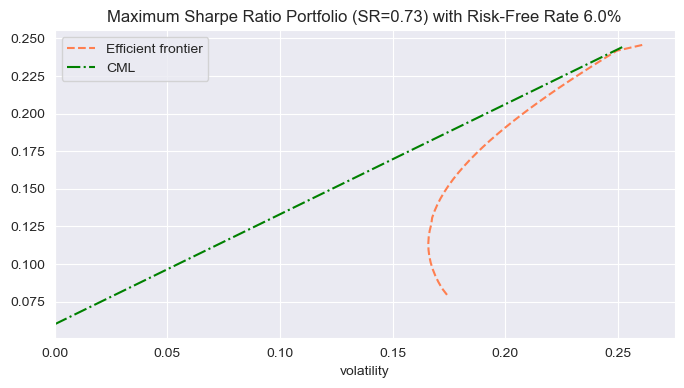

In [43]:
# Plotting the efficient frontier and the Capital Market Line
df, ax = pok.efficient_frontier(40, daily_rets, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, cml=True)
ax.set_title("Maximum Sharpe Ratio Portfolio (SR={}) with Risk-Free Rate {}%".format(np.round(shp, 2), risk_free_rate*100))
plt.show()

This graph illustrates how the inclusion of a risk-free asset expands the range of available return-volatility combinations. The CML represents a new set of optimal portfolios, offering higher returns for the same level of risk compared to the original efficient frontier.

Additionally, it's possible to plot various significant portfolios on the efficient frontier:This graph illustrates how the inclusion of a risk-free asset expands the range of available return-volatility combinations. The CML represents a new set of optimal portfolios, offering higher returns for the same level of risk compared to the original efficient frontier.

Additionally, it's possible to plot various significant portfolios on the efficient frontier:

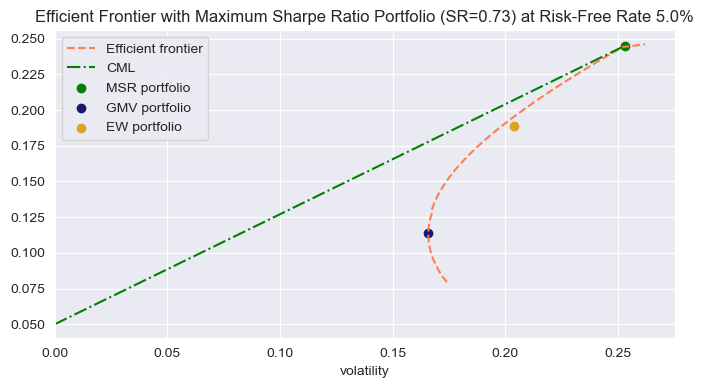

,0,1,2,3,4,5
88,0.252162,0.244155,0.769961,2.234717e-01,4.669922e-03,0.771858
89,0.262099,0.246025,0.747907,1.753543e-09,6.505213e-19,1.000000
90,0.253019,0.244932,0.770423,2.235848e-01,0.000000e+00,0.776415
91,0.165811,0.114024,0.386125,9.627966e-02,7.901969e-01,0.113523
92,0.203728,0.188911,0.681846,3.333333e-01,3.333333e-01,0.333333


In [46]:
# Adjusting the risk-free rate
risk_free_rate = 0.05

# Plotting the efficient frontier with additional portfolio markers
df, ax = pok.efficient_frontier(90, daily_rets, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, hsr=True, cml=True, mvp=True, ewp=True)
ax.set_title("Efficient Frontier with Maximum Sharpe Ratio Portfolio (SR={}) at Risk-Free Rate {}%".format(np.round(shp, 2), risk_free_rate*100))
plt.show()

# Displaying the tail of the dataframe for a quick glimpse at the portfolio combinations
df.tail()

In this script, the efficient frontier is plotted, highlighting various portfolios such as the **`highest Sharpe ratio portfolio`**, the **`minimum volatility portfolio`**, and the **`equally weighted portfolio`**. The graph and the data provide insights into the potential risk-return profiles, assisting investors in making informed decisions based on their risk preferences and investment goals.

### Maximizing the Sharpe Ratio Portfolio with a Non-Zero Risk-Free Asset

Consider a scenario where, in addition to a set of risky assets, there's also a risk-free asset with zero volatility and a return equal to the risk-free rate $R_f$ . This situation allows for the opportunity to minimize the volatility of the portfolio, which consists of a portion invested in the risky assets and the remainder in the risk-free asset. The goal is to minimize the volatility of the risky asset portion while achieving a target return $R_0$:

Minimize:

$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w},
$$

subject to

$$
\begin{cases}
\mathbf{w}^T \mathbf{R} + (1 - \mathbf{w}^T\mathbf{1})R_f &= R_0,  \\
\end{cases}
$$

Here, short selling of assets is allowed, and the entire capital is invested. The Lagrangian is defined as:

$$
\mathcal{L}(\mathbf{w}, \lambda) := 
\frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} 
- \lambda\left( \mathbf{w}^T \mathbf{R} + (1-\mathbf{w}^T\mathbf{1})R_f - R_0\right),
$$

and the partial derivatives are set to zero:

$$
\begin{cases}
\frac{\partial\mathcal{L}}{\partial \mathbf{w}} &= \frac{1}{2} (2\Sigma \mathbf{w}) - \lambda \mathbf{R} + \lambda R_f \mathbf{1}= 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{R} - (1-\mathbf{w}\mathbf{1})R_f + R_0 = 0, \\
\end{cases}
$$

From here, the optimal weights $\mathbf{w}$ can be calculated, and the allocation to the risk-free asset is determined by $1-\mathbf{w}^T\mathbf{1}$.

> 📌 **Note**:
>
> *The process of determining optimal weights $\mathbf{w}^*$ for a portfolio that includes both risky assets and a risk-free asset involves several steps.*
>
> *Initially, the equation $\mathbf{w} = \lambda \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1})$ is derived from the first condition.*
>
> *This expression is then used in the second condition to solve for $\lambda$, which yields $\lambda = \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})}$.*
>
> *Subsequently, $\lambda$ is substituted back into the expression for $\mathbf{w}$ to find the optimal portfolio weights $\mathbf{w}^*$, which are determined as $\mathbf{w}^* = \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}) = r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1})$,*
>
> *where $r$ is a scaling factor defined by the portion of the portfolio's excess return over the risk-free rate to the variance of the excess returns.*

#### Portfolio Return & Volatility

A portfolio constructed with these weights is expected to yield a return equivalent to the predetermined target return, $R_0$. This is demonstrated as follows:

$$
\mu_p = \mathbf{w^*}^T \mathbf{R} + (1 - \mathbf{w^*}^T\mathbf{1})R_f
= r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}\mathbf{R} + R_f - r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1} R_f \mathbf{1}
= \underbrace{ r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) }_{= R_0 - R_f}   + R_f  = R_0.
$$

This equation illustrates that the portfolio's return aligns with the specified target return when the optimal weights are applied.

The portfolio's volatility is determined by:

$$
\sigma_p^2 = \mathbf{w^*}^T\Sigma\mathbf{w^*} 
= \left( r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}) \right)^T \Sigma \left( r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}) \right)
= r^2 (\mathbf{R} - R_f\mathbf{1})^T \Sigma^{-1}\underbrace{\Sigma\Sigma^{-1}}_{=Id} (\mathbf{R} - R_f\mathbf{1})
= \frac{(R_0-R_f)^2}{ \left( (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) \right)^2 }
(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})
$$

which simplifies to:

$$
\sigma_p = \frac{(R_0-R_f)}{ \sqrt{ (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }.
$$

#### Portfolio Weights for Full Allocation to Risky Assets (Maximum Sharpe Ratio)

In the presence of a risk-free asset, an investor might choose to allocate all available capital to risky assets. In this scenario, the optimal weights can be derived by normalizing the efficient weights previously calculated. Specifically, the optimal weights $\mathbf{w}^*$ are proportional to the vector $\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})$, where the proportionality constant is $r$.

This allows the formulation of weights for the portfolio with full allocation to risky assets $\mathbf{w}_M$ as:

$$
\mathbf{w}_M := \frac{\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) },
$$

Here, the denominator sums the weights in $\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})$, ensuring that the weights in $\mathbf{w}_M$ sum to 1, representing a complete allocation to risky assets and none to the risk-free asset.

The return for such a portfolio is:

$$
\mu_M = \mathbf{w}_M^T\mathbf{R} = \frac{ (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}\mathbf{R} }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})},
$$

And the volatility is:

$$
\sigma_M^2 = \mathbf{w}_M^T \Sigma \mathbf{w}_M = \frac{(\mathbf{R}-R_f\mathbf{1})^T \Sigma^{-1} (\mathbf{R}-R_f\mathbf{1})}{ \left( \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) \right)^2 }
\quad \Longrightarrow\quad 
\sigma_M = \frac{ \sqrt{(\mathbf{R}-R_f\mathbf{1})^T \Sigma^{-1} (\mathbf{R}-R_f\mathbf{1})}  }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})  }.
$$

The portfolio constituted solely of risky assets, with weights $\mathbf{w}_M$, is inherently a minimum volatility portfolio on the efficient frontier. It is also the portfolio with the highest Sharpe Ratio.

Considering two specific portfolios:

- The portfolio comprising only the risk-free asset $(\sigma,\mu) = (0, R_f)$
- The portfolio comprising only risky assets $(\sigma,\mu) = (\sigma_M, \mu_M)$

The Capital Market Line (CML) is the line connecting these two portfolios, described by:

$$
\mu = R_f + \frac{\mu_M - R_f}{\sigma_M} \sigma,
$$

This line represents the range of portfolios that can be formed by varying allocations between the risk-free asset and the risky assets. The slope of the CML is equivalent to the Sharpe Ratio of the portfolio with $\mu_M$ and $\sigma_M$, indicating that it is the **`Maximum Sharpe Ratio portfolio`**.

Therefore, any point on the CML represents an investment in both the risk-free asset and the risky assets, with weights given by $\mathbf{w}^*$.

To demonstrate these concepts in Python:

Optimal weights for Maximum Sharpe Ratio Portfolio:
  AMZN: 22.24%
  KO:   0.00%
  MSFT: 77.76%
Weights for full allocation to risky assets (w_M):
[ 0.3338592  -0.64503401  1.3111748 ]
Return (mu_M): 0.3517605378426214, Volatility (sigma_M): 0.3848066679985497
Weights for combined investment (w^*):
[ 0.08010043 -0.15475835  0.31458071  0.76007722]
Combined portfolio Return (mu_p): 0.13, Volatility (sigma_p): 0.09232388642780842


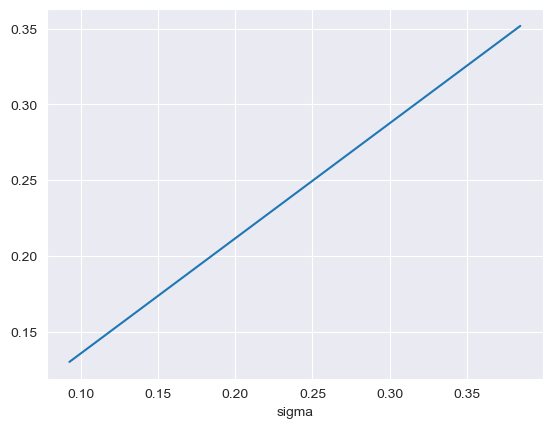

In [50]:
# Define your parameters and data (make sure these are correctly set)
risk_free_rate = 0.06
# ann_rets: Series of annualized returns for your assets
# cov_rets: DataFrame of covariance matrix for your assets
# periods_per_year: number of periods per year, typically 252 for trading days

# Calculate optimal weights for Maximum Sharpe Ratio Portfolio
optimal_weights = pok.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("Optimal weights for Maximum Sharpe Ratio Portfolio:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

# Verifying the formulas for maximum Sharpe Ratio (MSR) portfolio weights
invcov = pok.inverse_df(cov_rets)
ones = np.repeat(1, 3)
r_rf = ann_rets - risk_free_rate * ones

w_M = np.dot(invcov, r_rf) / np.dot(ones, np.dot(invcov, r_rf))
print("Weights for full allocation to risky assets (w_M):")
print(w_M)

# Verify the portfolio with these weights has the expected return and volatility
mu_M = pok.portfolio_return(w_M, ann_rets)
sigma_M = pok.annualize_vol(pok.portfolio_volatility(w_M, cov_rets), periods_per_year)
print(f"Return (mu_M): {mu_M}, Volatility (sigma_M): {sigma_M}")

# Define weights for a portfolio that invests in both the risk-free asset and risky assets
target_ret = 0.13
wstar = (target_ret - risk_free_rate) / np.dot(r_rf, np.dot(invcov, r_rf)) * np.dot(invcov, r_rf)
print("Weights for combined investment (w^*):")
print(np.append(wstar, 1 - wstar.sum()))

# Calculating and verifying the return and volatility of this combined portfolio
risk_free_rate_series = pd.Series([risk_free_rate], index=["Risk-Free Rate"])
combined_ann_rets = pd.concat([ann_rets, risk_free_rate_series])

mu_p = pok.portfolio_return(np.append(wstar, 1 - wstar.sum()), combined_ann_rets)
sigma_p = pok.annualize_vol(pok.portfolio_volatility(wstar, cov_rets), periods_per_year)
print(f"Combined portfolio Return (mu_p): {mu_p}, Volatility (sigma_p): {sigma_p}")

# Plotting portfolios on the Capital Market Line
target_ret_vec = np.linspace(target_ret, mu_M, 20)
wstar = [(tr - risk_free_rate) / np.dot(r_rf, np.dot(invcov, r_rf)) * np.dot(invcov, r_rf) for tr in target_ret_vec]
wstar = [np.append(wstar[i], 1 - wstar[i].sum()) for i in range(len(wstar))]

mus = [pok.portfolio_return(wstar[i], combined_ann_rets) for i in range(len(wstar))]
sigmas = [pok.annualize_vol((tr - risk_free_rate) / np.sqrt(np.dot(r_rf, np.dot(invcov, r_rf))), periods_per_year) for tr in target_ret_vec]

CML = pd.concat([pd.DataFrame(sigmas), pd.DataFrame(mus)], axis=1)
CML.columns = ["sigma", "mu"]
CML.plot.line(x="sigma", y="mu", grid=True, legend=False)
plt.show()

It combines theoretical explanations with Python code to demonstrate the calculation of portfolio weights for full allocation to risky assets and how these portfolios align with the Capital Market Line.